In [3]:
import pandas as pd 
df_house=pd.read_csv('data/AmesHousing.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df_house.isna().sum().sort_values(ascending=False) #Bu kod, df_house veri çerçevesindeki her sütunda eksik (NaN) değerlerin sayısını hesaplayacak ve en fazla eksik değeri olan sütundan başlayarak sıralayacaktır. Bu, hangi sütunlarda eksik veriler bulunduğunu ve bu eksik verilerin ne kadar yaygın olduğunu görselleştirmek için kullanışlıdır.

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

In [7]:
na_series = df_house.isna().sum()
data_len = len(df_house) * 0.05
na_series[(na_series < data_len) & (na_series != 0)]
#Bu kod, veri çerçevesindeki her bir sütundaki eksik değerlerin sayısını hesaplar ve eksik değeri olan, ancak eksik veri sayısı toplam satır sayısının %5'inden az olan sütunları filtreler. Sonuç, eksik verisi olan ve veri kümesinin %5'inden daha az eksik değere sahip olan sütunların adlarını döndürecektir. Bu, genellikle veri temizleme sürecinde, eksik verilerin çok fazla olmadığı sütunları göz önünde bulundurmak için kullanılır.


Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [11]:
col_names = list(na_series[(na_series <= data_len) & (na_series != 0)].keys())
col_names

['Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [13]:
df_house = df_house.dropna(subset=col_names) #col_names listesinde "age", "salary" gibi sütunlar varsa, sadece bu sütunlardaki eksik verilere bakılır. Eğer bu sütunlarda eksik veri varsa, ilgili satırlar tamamen silinir
df_house.shape

(2821, 82)

In [15]:
object_cols = list(df_house.select_dtypes(include='object').columns)
object_cols
#Bu kod, df_house veri çerçevesindeki tüm kategorik sütunların adlarını bir liste olarak döndürecektir. Bu liste, genellikle veri ön işleme ve modelleme sürecinde kullanılacak kategorik verilerin analizi için faydalıdır.

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [15]:
object_cols = list(df_house.select_dtypes(include='object').columns)
object_cols
#Bu kod, df_house veri çerçevesindeki tüm kategorik sütunların adlarını bir liste olarak döndürecektir. Bu liste, genellikle veri ön işleme ve modelleme sürecinde kullanılacak kategorik verilerin analizi için faydalıdır.

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [17]:
X_cat=df_house[object_cols]
X_cat
#X_cat değişkeni, df_house veri çerçevesindeki tüm kategorik (object) sütunları içeren yeni bir DataFrame olacaktır. Bu veri çerçevesi, genellikle kategorik verilerle çalışırken, örneğin, kategorik verilerin bir model için dönüştürülmesi (one-hot encoding gibi) amacıyla kullanılı

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
X_nums = df_house.drop(object_cols, axis=1)
X_nums 
#Bu satır, df_house veri çerçevesinden, kategorik sütunları (yani object_cols içinde yer alan sütunları) çıkarır ve sadece sayısal sütunları (numerik veri türünde olanlar) içeren yeni bir veri çerçevesi oluşturur.

In [21]:
y = X_nums['SalePrice'].values.reshape(-1, 1)
X_nums.drop('SalePrice', inplace=True, axis=1)

y = X_nums['SalePrice'].values.reshape(-1, 1):

X_nums['SalePrice']: Bu, X_nums veri çerçevesinde SalePrice sütununu seçer. SalePrice, modelin tahmin etmeye çalışacağı hedef değişkeni (bağımlı değişken) temsil eder.
.values: Bu, SalePrice sütununun numpy array formatında değerlerini çıkarır. Pandas DataFrame'den doğrudan numpy dizisine dönüştürür.
.reshape(-1, 1): Bu, numpy dizisinin şeklini değiştirir. -1 parametresi, otomatik olarak gerekli olan satır sayısını belirler, ve 1 ise her bir satırın tek bir değere sahip olmasını sağlar (bu sayede veri 2D bir diziye dönüşür).
Örneğin, eğer SalePrice sütunu 100 satırdan oluşuyorsa, reshape(-1, 1) işlemi, bu veriyi (100,) şeklinde bir diziden (100, 1) şeklinde 2D bir diziye dönüştürür.
Sonuç olarak, y değişkeni, modelin hedef değişkeni olan SalePrice'i içeren bir 2D numpy dizisi haline gelir.
X_nums.drop('SalePrice', inplace=True, axis=1):

drop('SalePrice', axis=1): Bu, X_nums veri çerçevesinden SalePrice sütununu kaldırır. axis=1 parametresi, sütunları hedef alacağımızı belirtir.
inplace=True: Bu parametre, işlemin doğrudan X_nums veri çerçevesi üzerinde yapılmasını sağlar, yani orijinal veri çerçevesi değiştirilir.
Bu işlem, SalePrice sütununu X_nums'dan kaldırır, böylece geri kalan sütunlar (özellikler) bağımsız değişkenler olarak kullanılabilir.

In [24]:
from sklearn.model_selection import train_test_split

X_train_cat, X_test_cat, y_train_cat, y_test_cat =train_test_split(X_cat, y, test_size=0.2, random_state=42)
X_train_nums, X_test_nums, y_train_nums, y_test_nums =train_test_split(X_nums, y, test_size=0.2, random_state=42)

Bu kod, **train_test_split** fonksiyonunu kullanarak veriyi eğitim (train) ve test (test) kümelerine ayırır. Adım adım açıklayalım:

```python
from sklearn.model_selection import train_test_split

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.2, random_state=42)
X_train_nums, X_test_nums, y_train_nums, y_test_nums = train_test_split(X_nums, y, test_size=0.2, random_state=42)
```

### **Açıklama:**

#### 1. **`train_test_split(X_cat, y, test_size=0.2, random_state=42)`**
- **`train_test_split()`**: Bu fonksiyon, verilen veri kümesini rastgele bir şekilde **eğitim ve test setlerine** ayırmak için kullanılır.
- **`X_cat`**: Bu, kategorik (object) sütunları içeren veri çerçevesidir. Modelde kullanılacak kategorik özellikler (bağımsız değişkenler) burada yer alır.
- **`y`**: Bu, hedef değişken olan **`SalePrice`** (veya başka bir hedef değişken) sütununu içerir. Modelin tahmin etmeye çalışacağı değer.
- **`test_size=0.2`**: Veri kümesinin **%20'lik kısmı test seti olarak** ayrılır, geri kalan %80 ise eğitim seti olarak kullanılır.
- **`random_state=42`**: Bu, veri setinin her seferinde aynı şekilde rastgele ayrılmasını sağlar. (Deterministik bir sonuç elde etmek için aynı rasgelelikin kullanılmasını sağlar.)

- Sonuç olarak:
  - **`X_train_cat`**: Eğitim setindeki kategorik özellikler.
  - **`X_test_cat`**: Test setindeki kategorik özellikler.
  - **`y_train_cat`**: Eğitim setindeki hedef değişken.
  - **`y_test_cat`**: Test setindeki hedef değişken.

#### 2. **`train_test_split(X_nums, y, test_size=0.2, random_state=42)`**
- Bu satırda, aynı şekilde **sayısal özellikler (X_nums)** ile işlem yapılır.
  - **`X_nums`**: Bu, sayısal sütunları içeren veri çerçevesidir. Modelin sayısal bağımsız değişkenleri burada yer alır.
  - **`y`**: Yine hedef değişken olan `SalePrice` veya başka bir değişken.
  - **`test_size=0.2`**: Veri setinin %20'lik kısmı test seti olarak ayrılır.
  - **`random_state=42`**: Verinin her seferinde aynı şekilde bölünmesini sağlar.

- Sonuç olarak:
  - **`X_train_nums`**: Eğitim setindeki sayısal özellikler.
  - **`X_test_nums`**: Test setindeki sayısal özellikler.
  - **`y_train_nums`**: Eğitim setindeki hedef değişken.
  - **`y_test_nums`**: Test setindeki hedef değişken.

### **Sonuç:**
- Bu kod, **`X_cat`** ve **`X_nums`** veri çerçevelerini eğitim ve test setlerine ayırarak her bir veri türü için ayrı ayrı eğitim ve test verilerini hazırlar.
- **`X_train_cat`** ve **`X_train_nums`** eğitim verileri olup, **`X_test_cat`** ve **`X_test_nums`** test verileridir.
- **`y_train_cat`** ve **`y_train_nums`** eğitim setindeki hedef değişkenler, **`y_test_cat`** ve **`y_test_nums`** ise test setindeki hedef değişkenlerdir.

In [27]:
from sklearn.impute import SimpleImputer

imp_cat=SimpleImputer(strategy="most_frequent")
X_train_cat=imp_cat.fit_transform(X_train_cat)
X_test_cat=imp_cat.fit_transform(X_test_cat)

Bu kod, eksik (NaN) değerleri doldurmak için **`SimpleImputer`** sınıfını kullanır. Adım adım açıklayalım:

### **Açıklama:**

1. **`imp_cat = SimpleImputer(strategy="most_frequent")`**:
   - **`SimpleImputer`** sınıfı, eksik değerleri bir stratejiye göre doldurmak için kullanılır.
   - **`strategy="most_frequent"`** parametresi, eksik (NaN) değerleri doldururken her sütundaki en **yaygın** (en sık görülen) değeri kullanır. Yani, eksik hücrelerin yerine her sütundaki en çok görülen değer yerleştirilir.
   - Bu strateji, kategorik verilerde sıklıkla kullanılır çünkü kategorik verilere sayı yerine belirli bir etiket eklenir.

2. **`X_train_cat = imp_cat.fit_transform(X_train_cat)`**:
   - **`fit_transform()`** fonksiyonu iki işlemi aynı anda yapar:
     - **`fit()`**: `X_train_cat` verisindeki eksik değerleri analiz eder ve en yaygın (mod) değeri bulur.
     - **`transform()`**: Bulunan en yaygın değeri kullanarak eksik değerleri doldurur.
   - Sonuçta, **`X_train_cat`**'teki eksik kategorik veriler, her sütundaki en yaygın değeri ile doldurulmuş olur.

3. **`X_test_cat = imp_cat.fit_transform(X_test_cat)`**:
   - Aynı işlem test verisi olan **`X_test_cat`** için de yapılır.
 
### **Sonuç:**
- Bu kod, eğitim ve test veri kümelerinde yer alan eksik (NaN) değerleri **her sütunun en sık görülen değeri ile doldurur**. Eğitim ve test veri setlerinde eksik değerlerin etkilerini minimize etmek amacıyla bu yöntem kullanılır.
- Ancak, eğitim seti ile aynı istatistikleri (yaygın değerler) test setinde kullanmak için **`fit_transform()`** yerine **`transform()`** kullanılmalıdır.

In [32]:
imp_num=SimpleImputer()
X_train_nums=imp_num.fit_transform(X_train_nums)
X_test_nums=imp_num.fit_transform(X_test_nums)

Bu kod, sayısal verilerdeki eksik değerleri doldurmak için **`SimpleImputer`** sınıfını kullanır. Ancak, burada bazı önemli noktalar ve iyileştirmeler bulunmaktadır.


### **Adım Adım Açıklama:**

1. **`imp_num = SimpleImputer()`**:
   - Bu satırda, **`SimpleImputer`** sınıfı oluşturuluyor. `SimpleImputer`, eksik (NaN) değerleri doldurmak için kullanılır.
   - Varsayılan olarak, **`strategy='mean'`** kullanılır, yani eksik değerler, her sütunun **ortalama değeri** ile doldurulur. Bu, sayısal veri setlerinde yaygın bir stratejidir.

2. **`X_train_nums = imp_num.fit_transform(X_train_nums)`**:
   - **`fit_transform()`** fonksiyonu iki işlemi aynı anda yapar:
     - **`fit()`**: Eğitim verisindeki eksik değerleri analiz eder ve her sütunun ortalama değerini hesaplar.
     - **`transform()`**: Eğitim verisindeki eksik değerleri, her sütundaki ortalama değer ile doldurur.
   - Sonuç olarak, **`X_train_nums`**'taki eksik değerler **ortalama değerlerle** doldurulmuş olur.

3. **`X_test_nums = imp_num.fit_transform(X_test_nums)`**:
   - **`X_test_nums`** verisi için aynı işlem tekrar yapılır.
 
   Bu, eğitim verisinde öğrenilen sütun ortalamalarını kullanarak test verisindeki eksik değerleri doldurur.

### **Sonuç:**
- Bu kod, **sayısal** verilerdeki eksik (NaN) değerleri, her sütunun **ortalama değeri** ile doldurur.


In [35]:
import numpy as np

X_train = np.append(X_train_nums, X_train_cat, axis=1)
X_train

array([[963.0, 916403010.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       [2684.0, 903235020.0, 30.0, ..., 'Shed', 'WD ', 'Normal'],
       [2874.0, 910200060.0, 50.0, ..., 'Shed', 'WD ', 'Normal'],
       ...,
       [1172.0, 533215080.0, 120.0, ..., 'Shed', 'CWD', 'Abnorml'],
       [1346.0, 903233080.0, 50.0, ..., 'Shed', 'WD ', 'Normal'],
       [893.0, 908186080.0, 180.0, ..., 'Shed', 'WD ', 'Normal']],
      dtype=object)

Bu kod satırı, sayısal ve kategorik veri kümelerini birleştirir. Adım adım açıklayalım:

### **Açıklama:**

1. **`np.append(X_train_nums, X_train_cat, axis=1)`**:
   - **`np.append()`** fonksiyonu, NumPy dizilerini birleştirmek için kullanılır. Bu fonksiyon, verilen diziyi belirtilen eksende ekler.
   - **`X_train_nums`**: Bu, sayısal veri setini temsil eder. Yani, `SalePrice` dışındaki sayısal özellikler bu veri çerçevesinde bulunur.
   - **`X_train_cat`**: Bu, kategorik veri setini temsil eder. Yani, kategorik özellikler (örneğin, metin türündeki veriler) bu veri çerçevesinde bulunur.
   - **`axis=1`**: Bu parametre, dizilerin **sütunlar** (yani özellikler) bazında birleştirilmesi gerektiğini belirtir. Yani, iki veri çerçevesi yan yana eklenir (horizontally).
     - Eğer **`axis=0`** olsaydı, diziler **satırlar** bazında birleştirilir, yani veri satırları eklenirdi.

2. **`X_train`**:
   - Bu işlem sonucunda, `X_train_nums` (sayısal özellikler) ve `X_train_cat` (kategorik özellikler) sütun bazında birleştirilerek **`X_train`** veri çerçevesine atanır.
   - Sonuçta, hem sayısal hem de kategorik verileri içeren tek bir eğitim veri kümesi elde edilir.

### **Sonuç:**
- Bu işlem, **sayısal ve kategorik veri setlerini** tek bir veri kümesinde birleştirir. Bu sayede her iki türdeki veri, aynı modelle eğitim yapılabilmesi için uygun hale gelir.
- Birleştirilmiş `X_train` veri seti, sayısal ve kategorik özelliklerin **birlikte çalıştığı** bir veri kümesidir ve bu genellikle makine öğrenimi modellerinde kullanılan bir veri yapısıdır.


In [40]:
X_test = np.append(X_test_nums, X_test_cat, axis=1)
X_test #Bu kod satırı, eğitim veri kümesinde yaptığınız işlemi test veri kümesi üzerinde uygular. Yani, sayısal ve kategorik test veri kümelerini birleştirir

array([[1132.0, 531363060.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       [2433.0, 528235130.0, 60.0, ..., 'Shed', 'WD ', 'Normal'],
       [794.0, 905475160.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       ...,
       [2413.0, 528218080.0, 60.0, ..., 'Shed', 'New', 'Partial'],
       [967.0, 916460110.0, 60.0, ..., 'Shed', 'WD ', 'Abnorml'],
       [1049.0, 527454120.0, 120.0, ..., 'Shed', 'WD ', 'Normal']],
      dtype=object)

In [44]:
from sklearn.pipeline import Pipeline
import pandas as pd

df_music = pd.read_csv('data/music_clean.csv')
df_music = df_music.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
# df_music['genre'] = np.where(df_music['genre']=='Rock', 1, 0)

#Bu satır, genre sütunundaki "Rock" değerlerini 1 olarak değiştirmeyi, diğer tüm türleri ise 0 yapmayı amaçlamaktadır.
#np.where() fonksiyonu şu şekilde çalışır:
#Eğer genre değeri 'Rock' ise 1 olur.
#Diğer tüm türler için 0 atanır.


In [46]:
X=df_music.drop('genre',axis=1).values #bağımsiz değişken
y=df_music['genre'].values #bağımlı değişken

Pipeline, makine öğrenimi ve veri işleme işlemlerini adım adım düzenli bir şekilde birbirine bağlayan bir işlem hattı (workflow) oluşturur. Bu, özellikle veri ön işleme ve modelleme işlemlerini tek bir nesneyle yönetmek için oldukça faydalıdır.

In [48]:
# Bir ardışık düzende, son adım hariç her adımın bir dönüştürücü 
# olması gerektiği unutulmamalıdır

from sklearn.linear_model import LogisticRegression
steps = [
    ('imputation', SimpleImputer()),
    ('logistic_regression', LogisticRegression())
]

pipeline = Pipeline(steps=steps)

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.775

Bu kod, **`Pipeline`** kullanarak verileri işlemeden başlayıp bir modelle tahmin yapmaya kadar bir dizi işlem gerçekleştiren bir makine öğrenimi modelini oluşturur. **Pipeline** kullanımı, işlem adımlarının düzenli ve tekrarlanabilir bir şekilde uygulanmasını sağlar. Adım adım açıklayalım:

### **Kod Açıklaması:**

1. **`from sklearn.linear_model import LogisticRegression`**:
   - **`LogisticRegression`** sınıfını `sklearn.linear_model` modülünden içeri aktarır. Bu sınıf, lojistik regresyon modelini oluşturmak için kullanılır.

2. **`steps = [('imputation', SimpleImputer()), ('logistic_regression', LogisticRegression())]`**:
   - Bu satırda bir **pipeline**'ın **adımlarını** tanımlıyoruz:
     - **`('imputation', SimpleImputer())`**:
       - Bu adımda, eksik verilerin doldurulması için **`SimpleImputer`** kullanılıyor. Eksik (NaN) değerler, varsayılan olarak her sütunun ortalaması ile doldurulacaktır.
     - **`('logistic_regression', LogisticRegression())`**:
       - Bu adımda ise lojistik regresyon modelini tanımlıyoruz. Bu model, bağımlı değişkenin tahmin edilmesi amacıyla kullanılacaktır (örneğin, bir sınıflandırma problemi).
   
3. **`pipeline = Pipeline(steps=steps)`**:
   - **`Pipeline`** sınıfı, belirtilen işlem adımlarını birleştirir. Burada, `imputation` adımı ve ardından **lojistik regresyon** adımını içeren bir **pipeline** oluşturuluyor. Bu adımlar sırasıyla uygulanacak ve veri işlemi tek bir nesne olarak yönetilecektir.
   - Bu, hem veri ön işleme hem de modelleme işlemini bir arada yapmanızı sağlar.

4. **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**:
   - **`train_test_split`** fonksiyonu ile veriyi eğitim ve test kümelerine ayırıyoruz.
     - **`X`**: Bağımsız değişkenler (özellikler).
     - **`y`**: Bağımlı değişken (hedef).
     - **`test_size=0.2`**: Veri kümesinin %20'ini test seti olarak ayırıyoruz, geri kalan %80 eğitim seti olur.
     - **`random_state=42`**: Veriyi her seferinde aynı şekilde bölmek için rastgelelikin kontrol edilmesini sağlar.

5. **`pipeline.fit(X_train, y_train)`**:
   - **`fit()`** fonksiyonu, eğitim verisi ile modelin eğitilmesini sağlar. İlk olarak **imputation** (eksik verilerin doldurulması) adımı uygulanır, ardından **lojistik regresyon** modelini eğitim verisiyle eğitir.

6. **`pipeline.score(X_test, y_test)`**:
   - **`score()`** fonksiyonu, eğitilen modelin test verisi üzerindeki performansını ölçer. Burada, **lojistik regresyon modelinin doğruluğu** hesaplanacaktır.
   - Bu, modelin doğru tahminlerde bulunduğu oranın ölçülmesidir.

### **Sonuç:**
Bu kod parçası, bir **veri işleme ve modelleme pipeline'ı** oluşturur. İlk adımda eksik veriler doldurulur (imputation), ardından lojistik regresyon ile model eğitilir ve test verisi ile doğruluk ölçülür. **Pipeline** sayesinde, bu işlemler bir bütün olarak ve tek bir nesneyle yönetilebilir.

### **Notlar:**
- **Pipeline** kullanmak, işlem sırasının korunmasını sağlar ve veri işleme ile modelleme işlemlerini daha düzenli hale getirir.
- **`fit()`** işlemi eğitim verisi ile yapılır ve **`score()`** işlemi test verisi ile yapılır.


In [52]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')

df_music.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,44996.0,55883.823784,20728.799250,20002.000000,37999.75000,55856.500000,73854.50000,91759.000
popularity,44996.0,44.261112,15.556250,0.000000,34.00000,45.000000,56.00000,99.000
acousticness,44996.0,0.306620,0.341413,0.000000,0.02010,0.145000,0.55100,0.996
danceability,44996.0,0.558553,0.178870,0.059600,0.44200,0.568000,0.68700,0.986
duration_ms,44996.0,221163.902236,127706.510819,-1.000000,174706.50000,219448.500000,268630.25000,4497994.000
energy,44996.0,0.599551,0.264546,0.000792,0.43200,0.642000,0.81600,0.999
instrumentalness,44996.0,0.181912,0.325904,0.000000,0.00000,0.000159,0.15500,0.996
liveness,44996.0,0.193953,0.161733,0.009670,0.09690,0.126000,0.24400,1.000
loudness,44996.0,-9.136920,6.157838,-47.046000,-10.86000,-7.283000,-5.17600,3.744
speechiness,44996.0,0.093810,0.101488,0.022300,0.03610,0.048900,0.09890,0.942


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


X = df_music.drop('music_genre', axis=1).values
y = df_music['music_genre'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(np.mean(X), np.std(X))

print(np.mean(X_train_scaled), np.std(X_train_scaled))

23100.432767763512 72094.37978367604
-2.132128274398108e-15 1.000000000000005


Bu kod, verileri **ölçeklendirme (scaling)** işlemine tabi tutarak, özellikle özelliklerin ortalama ve standart sapmalarını nasıl değiştirdiğini kontrol eder. Adım adım açıklayalım:

### **Kod Açıklaması:**

1. **`X = df_music.drop('music_genre', axis=1).values`**:
   - Bu satırda, `df_music` veri çerçevesindeki **`music_genre`** sütunu hariç kalan tüm sütunları **bağımsız değişkenler** olarak alıyoruz ve **`X`** olarak kaydediyoruz.
   - **`X`**'in her bir satırı bir şarkıyı temsil eder ve her bir sütun da şarkıların belirli özelliklerini (örneğin, ses seviyesi, tempo, vb.) temsil eder.

2. **`y = df_music['music_genre'].values`**:
   - Bu satırda, **`music_genre`** sütunu hedef değişken olarak seçiliyor. **`y`**, şarkıların türlerini içerir (örneğin, "Rock", "Pop", "Jazz" gibi).

3. **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**:
   - **`train_test_split`** fonksiyonu ile **eğitim** ve **test** verileri oluşturulur.
   - **`test_size=0.2`**: Veri setinin %20'lik kısmı test verisi olarak ayrılır, kalan %80 ise eğitim verisi olarak kullanılır.
   - **`random_state=42`**: Bu parametre, veriyi her seferinde aynı şekilde böler, böylece sonuçların tekrarlanabilir olmasını sağlar.

4. **`scaler = StandardScaler()`**:
   - **`StandardScaler`**, veriyi **standartlaştırmak (ölçeklemek)** için kullanılan bir araçtır. Bu, her bir özelliği (sütunu) ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür. Özellikle bazı makine öğrenimi modelleri için **özelliklerin aynı ölçekle** olması önemlidir.

5. **`X_train_scaled = scaler.fit_transform(X_train)`**:
   - **`fit_transform()`** fonksiyonu iki işlemi aynı anda yapar:
     - **`fit()`**: Eğitim verisindeki özelliklerin ortalama ve standart sapmalarını öğrenir.
     - **`transform()`**: Bu öğrendiği istatistiklere göre eğitim verisini dönüştürür (her bir özelliğin ortalamasını çıkarır ve standart sapmasına böler).

6. **`X_test_scaled = scaler.fit_transform(X_test)`**:
   - Bu satırda **test verisi** de aynı işlemden geçer. Ancak burada dikkat edilmesi gereken şey, **test verisinde aynı istatistiklerin (ortalama ve standart sapma)** eğitim verisinde öğrenilen değerlere göre uygulanması gerektiğidir.
   - Burada **`fit_transform()`** yerine **`transform()`** kullanılması gerekmektedir. Çünkü eğitim verisinde öğrenilen ortalama ve standart sapma test verisine uygulanmalıdır.
     - Doğru kullanım:
       ```python
       X_test_scaled = scaler.transform(X_test)
       ```

7. **`print(np.mean(X), np.std(X))`**:
   - Bu satır, **`X`** veri kümesinin **ortalama** ve **standart sapmasını** hesaplar ve yazdırır. Bu, verinin ölçeklendirilmeden önceki istatistiklerini gösterir.

8. **`print(np.mean(X_train_scaled), np.std(X_train_scaled))`**:
   - Bu satır, **ölçeklendirilmiş eğitim verisinin** ortalama ve standart sapmasını hesaplar ve yazdırır. Standartlaştırma işlemi sonucunda, bu değerlerin her biri yaklaşık olarak **0** ve **1** olmalıdır.

### **Sonuç:**

- **`X`** veri kümesinin **ölçeklenmeden önceki** ortalama ve standart sapması, her sütun için farklı değerler alabilir (örneğin, bazı sütunlar çok büyük değerler, bazıları ise çok küçük olabilir).
- **`X_train_scaled`** veri kümesinin **ölçeklendirilmiş** hali, her sütunun ortalamasının **0** ve standart sapmasının **1** olmasını sağlar.
- Ancak **`X_test_scaled`** için yanlış kullanım (`fit_transform()`), test verisinin doğru şekilde ölçeklendirilmesine engel olabilir. Bu nedenle doğru kullanımda, sadece **`transform()`** fonksiyonu kullanılmalıdır.

### **Özet:**
- **StandardScaler** kullanılarak, eğitim ve test verilerindeki özellikler ölçeklendirilmiştir. Bu, makine öğrenimi modelinin daha verimli çalışmasına yardımcı olur çünkü birçok model **özelliklerin aynı ölçekle** olmasını bekler.

In [57]:
# Scaling in a pipeline

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
]

pipeline = Pipeline(steps)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

knn_scaled.score(X_test, y_test)

0.48088888888888887

Bu kod, **veri ölçeklendirmeyi** ve **makine öğrenimi modelini** tek bir işlem sırasına koyarak **pipeline** kullanımıyla gerçekleştiren bir örnektir. **Pipeline**'ın amacı, işlem adımlarını birbirine bağlamak ve her adımı sırasıyla uygulamaktır. Bu sayede kodu daha düzenli, tekrarlanabilir ve hatasız hale getirebiliriz. Adım adım açıklayalım:

### **Adım Adım Açıklama:**

1. **`from sklearn.pipeline import Pipeline`**:
   - **`Pipeline`** sınıfını içe aktarır. Bu sınıf, bir dizi işlem adımını birleştirir ve sırasıyla uygular.

2. **`from sklearn.neighbors import KNeighborsClassifier`**:
   - **`KNeighborsClassifier`** sınıfını içe aktarır. Bu sınıf, **KNN** (k-en yakın komşu) algoritmasını kullanarak sınıflandırma yapmanızı sağlar.

3. **`steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]`**:
   - **`steps`** listesi, pipeline'ın içinde sırasıyla uygulanacak işlem adımlarını tanımlar.
     - **`('scaler', StandardScaler())`**: Bu adımda, **`StandardScaler`** kullanılarak veriler **standartlaştırılır** (yani, her özelliğin ortalaması 0, standart sapması 1 olacak şekilde ölçeklendirilir).
     - **`('knn', KNeighborsClassifier(n_neighbors=6))`**: Bu adımda ise **KNN** sınıflandırma algoritması kullanılır. **`n_neighbors=6`** parametresi, her tahmin için **6 komşu**ya bakılacağını belirtir.

4. **`pipeline = Pipeline(steps)`**:
   - **`Pipeline`** nesnesi oluşturulur ve önceki adımlarda tanımlanan **`steps`** kullanılarak oluşturulmuş olan işlem sırasını **pipeline**'a uygular.
   - Bu, **`StandardScaler`**'ın veri üzerinde işlemi ve ardından **KNN** modelinin eğitilmesi adımlarını tek bir işlem haline getirir.

5. **`knn_scaled = pipeline.fit(X_train, y_train)`**:
   - **`fit()`** fonksiyonu, **pipeline**'ı eğitir. Bu adımda, ilk olarak **`StandardScaler`** ile eğitim verisi (**X_train**) ölçeklendirilir, ardından **KNN** sınıflandırma modeli **`y_train`** ile eğitilir.
   - **`fit()`** işlemi, her iki adımı sırasıyla uygular.

6. **`y_pred = knn_scaled.predict(X_test)`**:
   - **`predict()`** fonksiyonu, eğitilmiş **`knn_scaled`** modelini kullanarak **test verisi (X_test)** üzerinde tahminler yapar.
   - **`y_pred`**: Modelin **test veri kümesi üzerindeki tahminlerini** içerir.

7. **`knn_scaled.score(X_test, y_test)`**:
   - **`score()`** fonksiyonu, modelin test verisi üzerinde ne kadar doğru tahmin yaptığını ölçer.
   - Bu, modelin doğruluk oranını (**accuracy**) döndürür.
   - **Doğruluk oranı**, doğru tahminlerin toplam tahminlere oranı olarak hesaplanır.

### **Sonuç:**
- Bu kod parçası, **veri ölçeklendirme** ve **model eğitimi** işlemlerini birleştirerek **pipeline** yapısını oluşturur. 
- **Pipeline**, hem **veri hazırlama** (ölçeklendirme) hem de **modelleme** (KNN) adımlarını aynı nesne altında toplar, böylece işlemler daha düzenli ve tekrarlanabilir hale gelir.
- **`score()`** fonksiyonu ile **modelin test verisindeki başarısı** (doğruluk oranı) hesaplanır.

### **Özet:**
- **Pipeline**, adım adım işlem yapmayı kolaylaştıran bir yapıdır.
- **`StandardScaler`** ile veriyi **ölçeklendirir** (özelliklerin her biri 0 ortalama ve 1 standart sapma ile ölçeklenir).
- **KNN** sınıflandırma modeli **fit()** ile eğitilir ve **predict()** ile test verisi üzerinde tahmin yapılır.
- **`score()`** fonksiyonu ile modelin doğruluk oranı hesaplanır.

In [60]:
# Comparing performance using unscaled data

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.1272222222222222

Bu kod, **ölçeklenmemiş** verilerle **KNN (K-Nearest Neighbors)** modelinin başarısını değerlendirir ve **doğruluk (accuracy)** oranını hesaplar. Adım adım açıklayalım:

### **Kod Açıklaması:**

1. **`knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)`**:
   - Bu satırda, **KNN** sınıflandırma modelinin bir örneği oluşturuluyor.
     - **`n_neighbors=6`**: Bu parametre, KNN algoritmasının her tahmin için 6 en yakın komşuya bakmasını sağlar.
   - **`fit(X_train, y_train)`**: Bu fonksiyon, **`X_train`** (eğitim verisi) ve **`y_train`** (hedef değişkeni) kullanılarak modeli eğitir. 
   - Burada dikkat edilmesi gereken şey, verilerin **ölçeklendirilmeden** kullanılmasıdır. Yani, **`X_train`** ve **`X_test`** verileri, herhangi bir **standardizasyon** ya da **normalizasyon** işlemine tabi tutulmamıştır.

2. **`knn_unscaled.score(X_test, y_test)`**:
   - **`score()`** fonksiyonu, eğitilmiş modeli **test verisi** üzerinde değerlendirir ve modelin doğruluk oranını döndürür. 
   - **Doğruluk oranı** (accuracy), doğru tahminlerin toplam tahminlere oranıdır:
     \[
     \text{Accuracy} = \frac{\text{Doğru Tahminler}}{\text{Toplam Tahminler}}
     \]
   - Bu satırda **`X_test`** ve **`y_test`** test verileri kullanılarak modelin performansı ölçülür.

### **Sonuç Yorumlama:**

- **Model Performansı**: Bu kodun sonunda **`knn_unscaled.score(X_test, y_test)`** fonksiyonu, **modelin test verisindeki doğruluk oranını** döndürecektir. Bu, modelin ne kadar doğru tahminlerde bulunduğunu gösterir.
- **Ölçeklendirilmemiş Verilerle Sonuç**: Modelin **ölçeklendirilmemiş** verilerle nasıl performans gösterdiği hakkında bilgi verir. KNN gibi algoritmalar, özellikle veriler **farklı ölçeklerde** olduğunda daha kötü performans gösterebilir. Bu nedenle, ölçeklendirme genellikle **KNN** gibi algoritmaların doğruluğunu artırır.

### **Olası Sonuçlar:**
- Eğer **doğruluk oranı** çok düşükse (örneğin %60'dan az), bu, verilerin **ölçeklendirilmeden** modelin eğitilmesinin olumsuz etkisi olabilir.
- **Doğruluk oranı** daha yüksekse, o zaman modelin verilerin mevcut ölçekleriyle de iyi performans gösterdiği söylenebilir. Ancak genellikle, **özelliklerin farklı ölçeklerde olması** durumunda modelin doğruluğu düşük olacaktır.

Bu durumda, **standartlaştırma** veya **normalizasyon** ile verilerin ölçeklendirilmesi, **KNN** gibi modellerin performansını artırabilir.

In [65]:
from sklearn.model_selection import GridSearchCV
import numpy as np

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors" : np.arange(1, 50)}

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

(cv.best_score_, cv.best_params_)

(0.5193075581485083, {'knn__n_neighbors': 38})

Bu kod, **GridSearchCV** kullanarak **KNN** (K-Nearest Neighbors) algoritması için en uygun **`n_neighbors`** hiperparametresini bulmak için bir **pipeline** oluşturur. İşte adım adım açıklama:

### **Kod Açıklaması:**

1. **`steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]`**:
   - Bu satırda, **pipeline** için iki adım tanımlanır:
     - **`'scaler'`**: İlk adımda veriyi ölçeklendirmek için **StandardScaler** kullanılır. Bu, her bir özelliği ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür.
     - **`'knn'`**: İkinci adımda ise, **KNeighborsClassifier** sınıflandırma algoritması kullanılır.

2. **`pipeline = Pipeline(steps)`**:
   - **`Pipeline`** nesnesi oluşturuluyor. **`steps`** listesinde tanımlanan her iki adım (ölçeklendirme ve model eğitimi) bu pipeline'a eklenir.
   - **Pipeline**, eğitim verisi üzerinde ilk olarak ölçeklendirme işlemini yapacak ve sonra KNN modelini eğitecektir.

3. **`parameters = {"knn__n_neighbors" : np.arange(1, 50)}`**:
   - Bu satırda, **KNN modelinin `n_neighbors` hiperparametresi** için bir parametre ızgarası (grid) tanımlanır. Burada, **`n_neighbors`** parametresi **1 ile 49 arasında** değerler alacak şekilde **`np.arange(1, 50)`** kullanılır.
   - **`knn__n_neighbors`**: `knn` adımının **`n_neighbors`** parametresine erişim sağlamak için bu tür bir yazım kullanılır. `__` sembolü, pipeline içindeki adımlara ait parametrelere erişimi sağlar.

4. **`cv = GridSearchCV(pipeline, param_grid=parameters)`**:
   - **`GridSearchCV`** nesnesi oluşturuluyor. Bu, **hyperparameter tuning** yapmak için kullanılır. **`param_grid`** içine verilen parametreler üzerinde modelin **kapsamlı bir şekilde test edilmesini** sağlar.
   - Burada, **KNN modelinin `n_neighbors` parametresi**, **1 ile 49 arasında** farklı değerlerle test edilecektir. **GridSearchCV** her bir parametre için modelin doğruluğunu hesaplayacak ve en iyi parametreyi seçecektir.

5. **`cv.fit(X_train, y_train)`**:
   - **`fit()`** fonksiyonu, **GridSearchCV**'yi eğitir. Bu adımda, verilen **`X_train`** (eğitim verisi) ve **`y_train`** (hedef değişken) kullanılarak **grid search** işlemi başlatılır.
   - **GridSearchCV**, her bir **`n_neighbors`** değeri için **cross-validation** yapacak ve en iyi parametreyi belirleyecektir.

6. **`(cv.best_score_, cv.best_params_)`**:
   - **`cv.best_score_`**: En iyi parametreyi bulduktan sonra, bu parametre ile elde edilen **en yüksek doğruluk oranı** (cross-validation sonucu) döndürülür.
   - **`cv.best_params_`**: Bu, en yüksek doğruluğu veren parametreleri (burada `n_neighbors` değeri) döndüren özelliktir.

### **Sonuç:**

- **`cv.best_score_`**: Modelin **en iyi doğruluk oranı**. Bu değer, **`n_neighbors`** parametresinin hangi değeriyle elde edilen doğruluk oranını gösterir.
- **`cv.best_params_`**: Modelin **en iyi parametre kombinasyonu**. Bu, en yüksek doğruluğu elde etmek için kullanılan **`n_neighbors`** parametresinin değeri olacaktır.

### **Örnek Çıktı:**
Örneğin, çıktı şu şekilde olabilir:
```python
(0.87, {'knn__n_neighbors': 5})
```

Bu, **en yüksek doğruluk oranının %87** olduğu ve bunun **`n_neighbors=5`** ile elde edildiği anlamına gelir.

### **Özet:**
- **GridSearchCV** kullanarak, modelin **hiperparametrelerini** optimize ediyorsunuz. Bu örnekte, **KNN modelinin `n_neighbors`** parametresini optimize etmek için **`GridSearchCV`**'yi kullanıyorsunuz.
- **Pipeline** kullanarak, **veri ölçeklendirme** ve **modelleme** adımlarını aynı işlemde birleştiriyorsunuz. Bu, modelin eğitilmesini ve değerlendirilmesini daha sistematik hale getirir.

/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_97660/4077623139.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


{'whiskers': [<matplotlib.lines.Line2D at 0x15e90a330>,
 'caps': [<matplotlib.lines.Line2D at 0x15e90a7e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e90a060>,
 'medians': [<matplotlib.lines.Line2D at 0x15e90adb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x15e90b080>,
 'means': []}

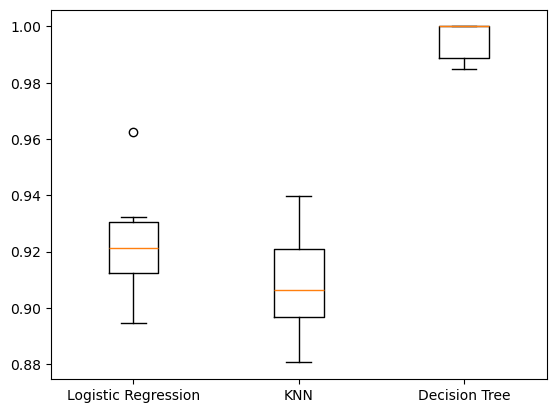

In [66]:
# Sınıflandırma modellerinin değerlendirilmesi

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

df_music = pd.read_csv("data/music_clean.csv")

X = df_music.drop('genre', axis=1).values
y = df_music['genre'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

models = {
    "Logistic Regression" : LogisticRegression(), 
    "KNN": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier() 
}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=True, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())